In [ ]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [ ]:
df = pd.read_csv('https://bit.ly/UsedCarsPrice')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df.columns

In [ ]:
cols = ['MetColor', 'Automatic']

In [ ]:
df[cols] = df[cols].astype(str)

In [ ]:
df.dtypes

In [ ]:
df.describe().round(3)

In [ ]:
df.describe(include = object)

In [ ]:
df.sort_values(by = 'KM')

In [ ]:
df = df.loc[df['KM'].gt(1), :].reset_index(drop = True)

In [ ]:
df.shape

In [ ]:
df['Price'].describe()[['min', 'max']]

In [ ]:
plt.rc(group = 'figure', dpi = 100)

In [ ]:
sns.histplot(data = df, x = 'Price', binrange = (4000, 16000), binwidth = 1000, 
             fc = '0.8', ec = '0')
plt.title(label = '중고차 가격의 분포', fontdict = {'fontweight': 'bold'});

In [ ]:
sns.kdeplot(data = df, x = 'Price', color = '0.8', fill = True)
plt.axvline(x = df['Price'].mean(), color = 'red', ls = '-', lw = 1)
plt.axvline(x = df['Price'].median(), color = 'red', ls = '--', lw = 1)
plt.title(label = '중고차 가격의 분포', fontdict = {'fontweight': 'bold'});

In [ ]:
df.columns[df.dtypes.eq('int64')]

In [ ]:
hds.plot.regline(data = df, x = 'Age', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'KM', y = 'Price')

In [ ]:
df1 = df.copy()

In [ ]:
df1['KM_sqrt'] = np.sqrt(df1['KM'])

In [ ]:
df1.head()

In [ ]:
hds.plot.regline(data = df1, x = 'KM_sqrt', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'HP', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'CC', y = 'Price')

In [ ]:
hds.plot.regline(data = df, x = 'Doors', y = 'Price')

In [ ]:
df['Doors'].value_counts().sort_index()

In [ ]:
hds.plot.regline(data = df, x = 'Weight', y = 'Price')
plt.axvline(x = 1250, color = 'red', ls = '--', lw = 0.5);

In [ ]:
hds.plot.box_group(data = df, x = 'FuelType', y = 'Price', pal = 'Pastel1')

In [ ]:
hds.plot.box_group(data = df, x = 'MetColor', y = 'Price', pal = 'Pastel1')

In [ ]:
hds.plot.box_group(data = df, x = 'Automatic', y = 'Price', pal = 'Pastel1')

In [ ]:
cond1 = df['Doors'].ne(2)
cond2 = df['Weight'].le(1250)
df = df.loc[cond1 & cond2, :]

In [ ]:
df = df.reset_index(drop = True)

In [ ]:
df.shape[0]

In [ ]:
df.dtypes

In [ ]:
df[cols] = df[cols].astype(int)

In [ ]:
df.head()

In [ ]:
df = pd.get_dummies(data = df, columns = ['FuelType'], dtype = int)

In [ ]:
df.head()

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
pd.to_pickle(obj = df, filepath_or_buffer= 'Used_Cars.pkl')

In [ ]:
os.listdir()

In [ ]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [ ]:
df = pd.read_csv('https://bit.ly/UnivAdmit')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df = df.astype({'rank': str})

In [ ]:
df.describe()

In [ ]:
df.describe(include = object)

In [ ]:
df['rank'].value_counts().sort_index()

In [ ]:
plt.rc(group = 'figure', dpi = 100)

In [ ]:
hds.plot.bar_freq(data = df, x = 'admit', pal = ['skyblue', 'orange'])

In [ ]:
hds.plot.box_group(data = df, x = 'admit', y = 'gre', 
                   pal = ['skyblue', 'orange'])

In [ ]:
hds.plot.box_group(data = df, x = 'admit', y = 'gpa', 
                   pal = ['skyblue', 'orange'])

In [ ]:
hds.plot.bar_dodge_freq(data = df, x = 'rank', group = 'admit', 
                        pal = ['skyblue', 'orange'])

In [ ]:
hds.plot.bar_stack_freq(data = df, x = 'rank', group = 'admit', 
                        pal = ['skyblue', 'orange'])

In [ ]:
hds.plot.bar_stack_prop(data = df, x = 'rank', group = 'admit', 
                        pal = ['skyblue', 'orange'])

In [ ]:
df.dtypes

In [ ]:
df = pd.get_dummies(data = df, columns = ['rank'], dtype = int)

In [ ]:
df.head()

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
pd.to_pickle(obj = df, filepath_or_buffer='Univ_Admit.pkl')

In [ ]:
os.listdir()

In [ ]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [ ]:
os.getcwd()

In [ ]:
os.chdir('../data')

In [ ]:
os.listdir()

In [ ]:
df = pd.read_pickle('Univ_Admit.pkl')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
yvar = 'admit'
X = df.drop(columns = yvar)
y = df[yvar].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, shuffle = True, random_state = 0, stratify = y
)

In [ ]:
print(X_train.shape)
print(X_valid.shape)

In [ ]:
y_train.value_counts(normalize = True)

In [ ]:
y_valid.value_counts(normalize = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X = X_train)

In [ ]:
X_valid = scaler.transform(X = X_valid)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(
    n_neighbors = 5, 
    weights = 'uniform', 
    metric = 'euclidean'
)

In [ ]:
model.fit(X = X_train, y = y_train)

In [ ]:
model.get_params()

In [ ]:
model.score(X = X_train, y = y_train)

In [ ]:
model.score(X = X_valid, y = y_valid)

In [ ]:
y_vprob1 = model.predict_proba(X = X_valid)

In [ ]:
y_vprob1

In [ ]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')

In [ ]:
y_vpred1 = model.predict(X = X_valid)

In [ ]:
y_vpred1

In [ ]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.recall_score(y_true = y_valid, y_pred = y_vpred1, pos_label = 'Pass')

In [ ]:
model.get_params()

In [ ]:
model.set_params(weights = 'distance')

In [ ]:
model.fit(X = X_train, y = y_train)

In [ ]:
model.score(X = X_train, y = y_train)

In [ ]:
model.score(X = X_valid, y = y_valid)

In [ ]:
y_vprob2 = model.predict_proba(X = X_valid)

In [ ]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'blue')

In [ ]:
y_vpred2 = model.predict(X = X_valid)

In [ ]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

In [ ]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred2)

In [ ]:
ks = np.arange(1, 101, 2)
valid_scores = []

for k in ks:
    model.set_params(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    accuracy = model.score(X = X_valid, y = y_valid)
    valid_scores.append(accuracy)

In [ ]:
valid_score_max = pd.Series(valid_scores).max()
sns.lineplot(x = ks, y = valid_scores)
plt.axhline(y = valid_score_max, color = 'red', ls = '--', lw = 0.5);

In [ ]:
pd.Series(valid_scores).max()

In [ ]:
np.max(valid_scores)

In [ ]:
np.argmax(valid_scores)

In [ ]:
ks[13]

In [ ]:
model.set_params(n_neighbors = 27)
model.fit(X = X_train, y = y_train)

In [ ]:
y_vprob3 = model.predict_proba(X = X_valid)

In [ ]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'blue')
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob3, color = 'green')

In [ ]:
y_vpred3 = model.predict(X = X_valid)

In [ ]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred3)

In [ ]:
metrics.f1_score(y_true = y_valid, y_pred = y_vpred3, pos_label = 'Pass')

In [ ]:
f1_scores = []
for k in ks:
    model.set_params(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    y_vpred = model.predict(X = X_valid)
    f1_score = metrics.f1_score(y_true = y_valid, y_pred = y_vpred, pos_label = 'Pass')
    f1_scores.append(f1_score)

In [ ]:
sns.lineplot(x = ks, y = f1_scores);

In [ ]:
model.set_params(n_neighbors = 1)
model.fit(X = X_train, y = y_train)

In [ ]:
y_vprob4 = model.predict_proba(X = X_valid)

In [ ]:
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob4)

In [ ]:
y_vpred4 = model.predict(X = X_valid)

In [ ]:
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred4)

In [1]:
import os
import numpy as np
import pandas as pd
from plt_rcs import *
import hds_stats as hds

In [2]:
os.getcwd()

'C:\\Users\\USER\\Documents\\project\\code'

In [3]:
os.chdir('../data')

In [4]:
os.listdir()

['APT_List.pkl',
 'APT_Tidy.pkl',
 'Cereal.pkl',
 'Univ_Admit.pkl',
 'Used_Cars.pkl']

In [5]:
df = pd.read_pickle('Used_Cars.pkl')

In [6]:
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Price            1268 non-null   int64
 1   Age              1268 non-null   int64
 2   KM               1268 non-null   int64
 3   HP               1268 non-null   int64
 4   MetColor         1268 non-null   int32
 5   Automatic        1268 non-null   int32
 6   CC               1268 non-null   int64
 7   Doors            1268 non-null   int64
 8   Weight           1268 non-null   int64
 9   FuelType_CNG     1268 non-null   int32
 10  FuelType_Diesel  1268 non-null   int32
 11  FuelType_Petrol  1268 non-null   int32
dtypes: int32(5), int64(7)
memory usage: 94.2 KB


In [8]:
yvar = 'Price'
X = df.drop(columns = yvar)
y = df[yvar].copy()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

In [11]:
print(X_train.shape)
print(X_valid.shape)

(1014, 11)
(254, 11)


In [12]:
y_train.mean()

9702.940828402367

In [13]:
y_valid.mean()

9672.53937007874

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X = X_train)

In [22]:
X_valid = scaler.transform(X = X_valid)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
model = KNeighborsRegressor(
    n_neighbors = 5, 
    weights = 'uniform', 
    metric = 'euclidean'
)

In [25]:
model.fit(X = X_train, y = y_train)

KNeighborsRegressor(metric='euclidean')

In [26]:
model.score(X = X_train, y = y_train)

0.7802749022943649

In [27]:
model.score(X = X_valid, y = y_valid)

0.6942671613341276

In [28]:
y_vpred1 = model.predict(X = X_valid)

In [29]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.342201e+06,1158.534156,0.015142,0.123055,916.81811,0.098825


In [30]:
from sklearn import metrics

In [31]:
metrics.mean_squared_error(y_true = y_valid, y_pred = y_vpred1)

1342201.3907086614

In [33]:
# metrics.mean_squared_error(y_true = y_valid, y_pred = y_vpred1) ** (1/2)
metrics.root_mean_squared_error(y_true = y_valid, y_pred = y_vpred1)

1158.5341560388547

In [34]:
metrics.mean_squared_log_error(y_true = y_valid, y_pred = y_vpred1)

0.015142436144854426

In [35]:
metrics.root_mean_squared_log_error(y_true = y_valid, y_pred = y_vpred1)

0.12305460635366083

In [36]:
metrics.mean_absolute_error(y_true = y_valid, y_pred = y_vpred1)

916.8181102362204

In [37]:
metrics.mean_absolute_percentage_error(y_true = y_valid, y_pred = y_vpred1)

0.09882475134305481

In [38]:
model.set_params(weights = 'distance')

KNeighborsRegressor(metric='euclidean', weights='distance')

In [39]:
model.fit(X = X_train, y = y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [40]:
model.score(X = X_train, y = y_train)

0.9999951234526139

In [41]:
model.score(X = X_valid, y = y_valid)

0.7141795352707923

In [42]:
y_vpred2 = model.predict(X = X_valid)

In [44]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.342201e+06,1158.534156,0.015142,0.123055,916.81811,0.098825


In [43]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred2)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.254784e+06,1120.171344,0.01441,0.120042,906.487171,0.098124


In [46]:
ks = np.arange(1, 101, 2)
valid_scores = []

for k in ks:
    model.set_params(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    r_squared = model.score(X = X_valid, y = y_valid)
    valid_scores.append(r_squared)

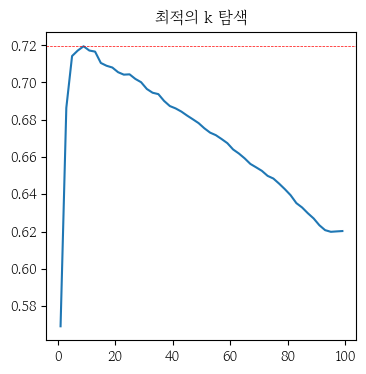

In [48]:
valid_score_max = np.max(valid_scores)
sns.lineplot(x = ks, y = valid_scores)
plt.axhline(y = valid_score_max, color = 'red', ls = '--', lw = 0.5)
plt.title(label = '최적의 k 탐색');

In [49]:
np.argmax(valid_scores)

4

In [50]:
ks[4]

9

In [51]:
model.set_params(n_neighbors = 9)
model.fit(X = X_train, y = y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=9, weights='distance')

In [55]:
model.score(X = X_train, y = y_train)

0.9999951234526139

In [56]:
model.score(X = X_valid, y = y_valid)

0.7194141773223084

In [52]:
y_vpred3 = model.predict(X = X_valid)

In [54]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred2)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.254784e+06,1120.171344,0.01441,0.120042,906.487171,0.098124


In [53]:
hds.stat.regmetrics(y_true = y_valid, y_pred = y_vpred3)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.231803e+06,1109.866287,0.013863,0.117742,873.667188,0.094074
